### Machine Learning Algorithms 

Context

In [ ]:
TREE

In [ ]:
KNN

In [ ]:
REGRESSION

In [126]:
import pandas as pd
movie_df=pd.read_csv('/Users/wty24/Desktop/2019SpringTerm/758T Data Mining and Predictive Analytics/Assignment/movies_data.csv')
movie_df.head()

,id,title,genre,budget,revenue,production_companies,united_states,english,title_change,popularity,vote_average,vote_count,month,year,runtime,successful
0,1,Finding Nemo,Animation,94000000,940335536,1.0,Yes,Yes,No,85.688789,7.6,6122,5,2003,100,1
1,2,Dancer in the Dark,Drama,12800000,40031879,26.0,Yes,Yes,No,22.022228,7.6,377,5,2000,140,1
2,3,My Life Without Me,Drama,0,9726954,2.0,No,Yes,No,7.958831,7.2,77,3,2003,106,1
3,4,Pirates of the Caribbean: The Curse of the Bla...,Action,140000000,655011224,2.0,Yes,Yes,No,271.972889,7.5,6985,7,2003,143,1
4,5,Kill Bill: Vol. 1,Action,30000000,180949000,3.0,Yes,Yes,No,79.754966,7.7,4949,10,2003,111,1


In [127]:
#process with categorical variables
X=movie_df.iloc[:,2:-1]
y=movie_df.iloc[:,-1]
for col in ['genre','united_states','english','title_change']:
    dummy=pd.get_dummies(X[col],drop_first=True,prefix=col)
    X=X.drop(col,axis=1)
    X=pd.merge(X,dummy,right_index=True,left_index=True)
X.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [128]:
X_train.head()

,budget,revenue,production_companies,popularity,vote_average,vote_count,month,year,runtime,genre_Adventure,...,genre_Documentary,genre_Drama,genre_Fantasy,genre_Horror,genre_Other,genre_Romance,genre_Thriller,united_states_Yes,english_Yes,title_change_Yes
2236,250000000,1021103568,4.0,108.849621,7.0,8297,11,2012,169,0,...,0,0,0,0,0,0,0,1,1,0
1898,0,0,1.0,0.147886,6.0,9,10,2006,97,0,...,0,1,0,0,0,0,0,0,1,0
237,110000000,574480841,4.0,48.780039,6.3,2862,10,2006,108,0,...,0,0,0,0,0,0,0,1,1,0
3372,0,0,0.0,0.061240,3.0,1,8,2015,93,0,...,0,0,0,0,0,0,0,0,1,0
1373,0,0,3.0,2.711955,5.1,17,8,2006,121,0,...,0,1,0,0,0,0,0,1,1,0


### Tree

In [52]:
#CART classification and regression tree
def impurity(x):
    a=x**2+(1-x)**2
    return 1-a

In [7]:
#GINI INDEX
#range~(0,0.5)
#before split
impurity(37/71)

0.4991073199761952

In [9]:
#after split
0.5*(impurity(1/7)+impurity(7/36))

0.2790847820609724

In [102]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
#通过GridSearchCV/RandomizedSearchCV, find the best hyperparameter combination, ex: {'max_depth':6,'max_features':5...}

# Fit it to the data
tree_cv.fit(X_train,y_train) #generate the model

#get accuracy
tree_cv.score(X_test,y_test)

0.834345186470078

training data
validation data(prune) avoid overfitting pick k(terminal nodes)
testing data

Pro: easy to explain
Con: computationally expensive
    large datasets

In [14]:
#Regression Tree
#impurity use RMSE(to make a split)
#parent node: RMSE0
#children node: W1*RMSE1+W2*RMSE2 小，继续split

In [ ]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

### KNN k-nearest-neighbors

training data (labels)
valid--pick K(K=5)

predictive model:
training data: total_train=train+valid
K=5

In [118]:
#how to decide new label?
1/3*(0+0+1)

0.3333333333333333

In [117]:
from sklearn.neighbors import KNeighborsClassifier
#model fitting
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) #generate the model
#model predicting
y_pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.981786643538595

### Split Traing and Testing data


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,random_state=21)

### Regression

In [30]:
import sklearn.datasets as ds
import pandas as pd

0.3431686302803003


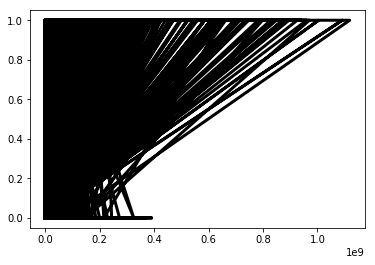

In [124]:
#linear regression
#OLS: sum squre of residual 
    
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)#generate the model
#y_pred = reg.predict(X_pred)

# Print R^2 
print(reg.score(X_test,y_test))

# Plot regression line
import matplotlib.pyplot as plt
plt.plot(X_test, y_test, color='black', linewidth=3)
plt.show()


### Cross Validation

In [ ]:
#validation used for pick parameter within the model(knn/tree)
#有了在指定参数下的model（knn中选定k=3），再测在validation上的average accuracy
#!!!最后选的是model的结构:
    linear regression(how many x involved)
    tree(how many terminal nodes)...

cv=5(number of folds)
k=3:(acc1+acc2+...+acc5)/5
k=4:(acc1+acc2+...+acc5)/5
Pro: avoid relying on train/test split
Con: too much computation

In [ ]:
#code
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

reg = LinearRegression()

cv_scores = cross_val_score(reg,X,y,cv=5)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

### Ridge/Lasso regression

In [34]:
import numpy as np

In [ ]:
#avoid parameter too big
Ridge: Loss Function = OLS Loss Function + sum((ai**2))

#Lasso 可以把不重要的变量，coefficient变为0，作为high dimension中选取关键变量
Lasso: Loss Function = OLS Loss Function + sum(np.abs(ai))  #feature selection, as unimportant ai can turn to 0

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.4,normalize=True)
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)   #不同alpha值
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10) #同一个alpha下，10个值
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_scores))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)#generate the model

y_pred = logreg.predict(X_test)

### Model Performance 

In [39]:
#except accuracy, to solve imbalance data
#TPR=tp/(tp+fn) (actual y=1)
#实际垃圾邮件20封/9980/true cancer patients be predicted
#（y=1) tpr=19/20

### ROC

y:TPR(actual是1的，多少预测出来的)
x:TNR(actual是0的，多少预测错了)
对角线:TPR=TNR（#common class 猜法）

In [41]:
# Import necessary modules
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#cut-off在不同的值，generate different pairs of (fpr,tpr)

NameError: name 'logreg' is not defined

In [ ]:
#hyper parameter tuning
choose parameter before fit model
Ex:k in KNN(1,2,3...)
for k in rang(1,100):
    cross_val(kNN,X,y,cv=10)
    #then take the highest average among all k

### Get Dummies

In [ ]:
df_region = pd.get_dummies(df,drop_first=True)
#include either numeric/categorical in the df

### Data Preprocessing

In [45]:
#Missing values(drop/impute average)
#Scaling(normalizing)

### PipeLine

In [ ]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,parameters,cv=3)

# Fit to the training set
gm_cv.fit(X_train,y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)

### Ensemble Methods

In [ ]:
D Tree/L Regression/kNN/ Others
每种model一个说法，meta model综合，给出结果

In [ ]:
Bootstapping:
    1   3    2    1
    1   3    3    2
    3   3    3    2
Bagging:
    Use bootstrap sample(100)--run 100 tree--combine 100 results
Random Forest:(m.n=1000)
    Each split only consider m variables(p所有变量**0.5) 
    #if there is a good predictor, force to use other variables
    #in this way, all these trees looks different, DO REAL ENSEMBLE!!!

In [141]:
# Set seed for reproducibility
SEED=1
# Instantiate each model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier

lr = LogisticRegression(random_state=SEED)
knn = KNN(n_neighbors=27)
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)
# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

from sklearn.ensemble import VotingClassifier
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     
vc.fit(X_train, y_train)   #每个model都已经各自train好
y_pred = vc.predict(X_test)

# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9783174327840416

### Bagging

In [145]:
#bagging and oob code
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
dt = DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=500,oob_score=True,random_state=1)
#oob_score=True Onaverage,每一次boostramp只会用到63% total data，将剩余37%unseen作为testing，only test at 'that' tree,
#get accuarcy of all the trees
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

# Evaluate accuracy
acc_test = accuracy_score(y_pred, y_test)
acc_oob = bc.oob_score_
acc_test

0.9774501300954033

### Random Forest

In [168]:
#different from Bagging because force the structure of tree to be different
#rf code
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=25,random_state=2) 
rf.fit(X_train, y_train) 
y_pred=[1 if y>0.5 else 0 for y in rf.predict(X_test)]
accuracy_score(y_pred,y_test)

0.9809193408499567

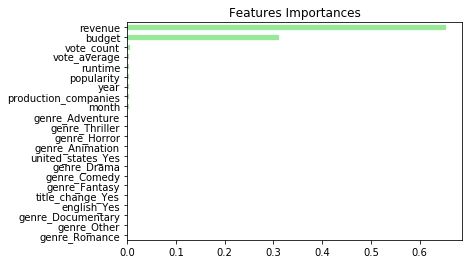

In [170]:
#Tree 可以tell feature的重要性，哪些factor重要 by how much the impurity decrease
# Draw a horizontal barplot of importances_sorted
importances = pd.Series(data=rf.feature_importances_,index= X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

### Boosting